## KMeans clustering algorithm in iris data for  petal length and  petal width...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [7]:
df.drop(["sepal length (cm)","sepal width (cm)"],axis="columns",inplace=True)

In [8]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### plotting the data points using scatter plot..

Text(0, 0.5, 'petal width (cm)')

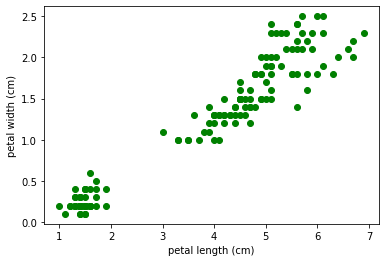

In [9]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],color="g")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

#### for best possible "K" value we use elbow method :

In [10]:
from sklearn.cluster import KMeans

In [11]:
#km = KMeans()

In [12]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
sse # sum of squared error

[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.465989010989013,
 13.91690875790876,
 11.057257664362925,
 9.244938551786378,
 7.615402244955953,
 6.456494541406307]

Text(0, 0.5, 'sse')

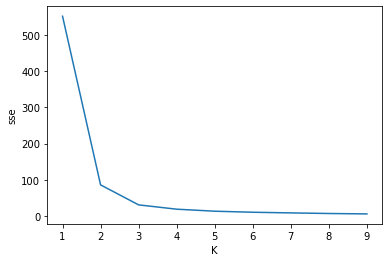

In [14]:
plt.plot(k_range,sse)
plt.xlabel("K")
plt.ylabel("sse")

#### therefore k=3 is the best one...

In [15]:
# now we use KMeans clustering algorithm...
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [16]:
km = KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])

C:\Users\Prasa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
df["cluster"] = y_predicted

In [20]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [21]:
df["cluster"].value_counts()

2    52
1    50
0    48
Name: cluster, dtype: int64

### creating three individual datasets based on clusters...

In [22]:
df0 = df[df["cluster"]==0]
df1 = df[df["cluster"]==1]
df2 = df[df["cluster"]==2]

No handles with labels found to put in legend.


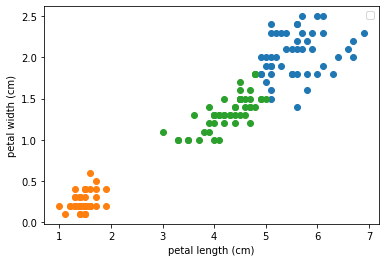

In [23]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"])
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()

### finding the centers for each clusters...

In [24]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

### ploting the centers for respective clusters...

No handles with labels found to put in legend.


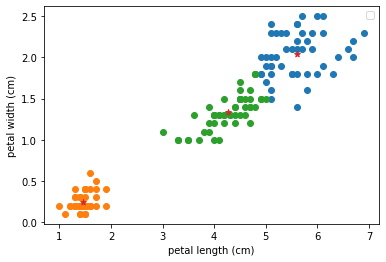

In [25]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"])
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()